Top level objectives of assignment 5  
  
• Install ADBench  
• Verify the installation is working  
• Use ‘skewed MNIST’ dataset  
• Treat the two sparsest classes as anomalies  
• Select two algorithms from the ADBench library  
• Apply the selected algorithms to the dataset  
• Characterize the results  
• Comment code  
• Write a report  
• Submit the code and report  

Method to accomplish objectives

1) Read in skewed_mnist data file 
2) Find two sparsest classes  
3) Generate a new labelset for 'Normal' and 'Anamalous'  
4) Split dataset into train and test
5) Fit model 1, MLP
6) Fit model 2, CatB
7) Generate statistics for report
8) Generate plots for report
9) Determine threshold value for simple classification accuracy analysis
9) Generate confusion matrix information for report
9) Calculate precision and recall  

Libraries to implement method  
numpy
matplotlib
scikit-learn
ADBench


Functions to implement above method
def test_supervised(X_train, X_test, y_train, y_test, model_name='XGB', verbose=False):  
def print_statistics(score, y):  
def plot_histograms(score, y):  
def get_threshold(score, y, sigmaP=3):  
def evaluate_at_threshold(threshold, score, y):  




y_labels=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]) y_counts=array([ 191,   23,  383, 6131, 3065,   95,  766,   11,   47, 1532],
      dtype=int64)
y_labels=array([7., 1., 8., 5., 0., 2., 6., 9., 4., 3.]) y_counts=array([  11,   23,   47,   95,  191,  383,  766, 1532, 3065, 6131],
      dtype=int64)
y_labels=array([0., 1.]) y_counts=array([9769,   26], dtype=int64)
Testing MLP model
Printing statistics for the scores
y_labels=array([0., 1.]) y_counts=array([2441,    8], dtype=int64)
Class 0.0 has 2441 samples
mean = 0.0011368541264359425, std = 0.03262094856143412, min = 0.0, max = 1.0
Class 1.0 has 8 samples
mean = 0.516422380474468, std = 0.48269795056133497, min = 2.0737184875172808e-42, max = 1.0


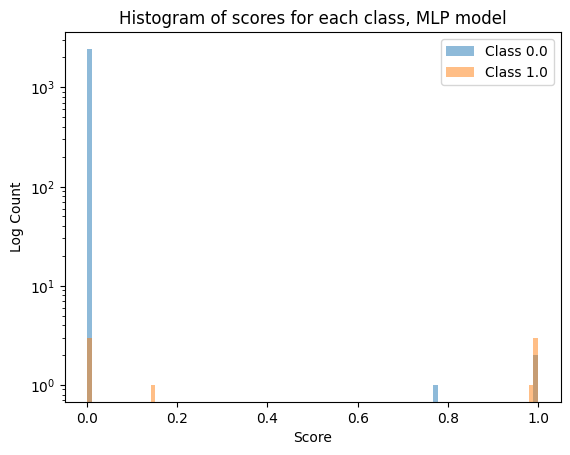

Evaluating at 0.5 sigma
Threshold = 0.017447328407153
Accuracy = 0.9975500204164965
Number of anomalies = 8.0
Number of anomalies detected = 8
Number of anomalies detected correctly = 5
Number of anomalies detected incorrectly = 3
Number of non-anomalies detected correctly = 2438
Number of non-anomalies detected incorrectly = 3
Number of non-anomalies = 2441.0
Number of non-anomalies detected = 2441
Precision = 0.625
Recall = 0.625
Evaluating at 1 sigma
Threshold = 0.03375780268787006
Accuracy = 0.9975500204164965
Number of anomalies = 8.0
Number of anomalies detected = 8
Number of anomalies detected correctly = 5
Number of anomalies detected incorrectly = 3
Number of non-anomalies detected correctly = 2438
Number of non-anomalies detected incorrectly = 3
Number of non-anomalies = 2441.0
Number of non-anomalies detected = 2441
Precision = 0.625
Recall = 0.625
Evaluating at 2 sigma
Threshold = 0.06637875124930417
Accuracy = 0.9975500204164965
Number of anomalies = 8.0
Number of anomalie

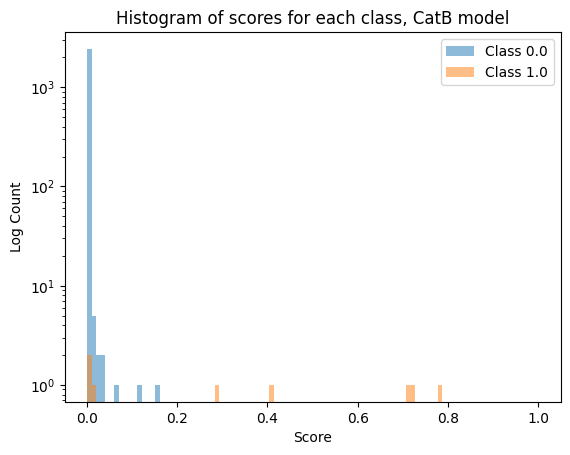

Evaluating at 0.5 sigma
Threshold = 0.0027269479659195513
Accuracy = 0.9804001633319722
Number of anomalies = 8.0
Number of anomalies detected = 54
Number of anomalies detected correctly = 7
Number of anomalies detected incorrectly = 47
Number of non-anomalies detected correctly = 2394
Number of non-anomalies detected incorrectly = 1
Number of non-anomalies = 2441.0
Number of non-anomalies detected = 2395
Precision = 0.12962962962962962
Recall = 0.875
Evaluating at 1 sigma
Threshold = 0.005001598407894476
Accuracy = 0.9889750918742344
Number of anomalies = 8.0
Number of anomalies detected = 33
Number of anomalies detected correctly = 7
Number of anomalies detected incorrectly = 26
Number of non-anomalies detected correctly = 2415
Number of non-anomalies detected incorrectly = 1
Number of non-anomalies = 2441.0
Number of non-anomalies detected = 2416
Precision = 0.21212121212121213
Recall = 0.875
Evaluating at 2 sigma
Threshold = 0.009550899291844328
Accuracy = 0.9938750510412413
Number

In [21]:
#lib imports
import numpy as np
import matplotlib.pyplot as plt
from adbench.baseline.Supervised import supervised
from sklearn.model_selection import train_test_split
#import confusion_matrix_pretty_print

#function definitions
def test_supervised(X_train, X_test, y_train, y_test, model_name='XGB', verbose=False):
    """
    Test a supervised model on the given training and testing data.

    Parameters:
    - X_train (array-like): Training data features.
    - X_test (array-like): Testing data features.
    - y_train (array-like): Training data labels.
    - y_test (array-like): Testing data labels.
    - model_name (str): Name of the model to use (default: 'XGB').
    - verbose (bool): Whether to print verbose output (default: False).

    Returns:
    - model: Trained supervised model.
    - score: Prediction score on the testing data.
    """
    model = supervised(seed=42, model_name=model_name)  # initialization
    model.fit(X_train, y_train) # training
    score = model.predict_score(X_test)
              
    return model, score

def print_statistics(score, y):
    """
    Prints statistics for the scores based on the labels.

    Parameters:
    score (numpy.ndarray): Array of scores.
    y (numpy.ndarray): Array of labels.

    Returns:
    None
    """
    #find unique values of y
    print("Printing statistics for the scores")
    y_labels, y_counts = np.unique(y, return_counts=True)    
    print(f'{y_labels=} {y_counts=}')    
    
    for i, label in enumerate(y_labels):
        print('Class {} has {} samples'.format(label, y_counts[i]))
        print(f'mean = {score[y==label].mean()}, std = {score[y==label].std()}, min = {score[y==label].min()}, max = {score[y==label].max()}')

def plot_histograms(score, y):
    """
    Plots histograms of scores based on different classes.

    Parameters:
    score (numpy.ndarray): Array of scores.
    y (numpy.ndarray): Array of class labels.

    Returns:
    matplotlib.figure.Figure: The figure object.
    matplotlib.axes.Axes: The axes object.
    """
    #find unique values of y
    y_labels, y_counts = np.unique(y, return_counts=True)
    fig, ax = plt.subplots()
    for i, label in enumerate(y_labels):
        ax.hist(score[y==label], bins=np.linspace(0,1,100), alpha=0.5, label='Class {}'.format(label), log=True)          

    ax.set_xlabel('Score')
    ax.set_ylabel('Log Count')    
    return fig, ax
    
def get_threshold(score, y, sigmaP=3):
    """
    Calculate the threshold value based on the given score and labels.

    Parameters:
    score (array-like): The scores for each sample.
    y (array-like): The labels for each sample.
    sigmaP (float, optional): The number of standard deviations to add to the mean of the scores for class 0. Default is 3.

    Returns:
    float: The calculated threshold value.
    """
    return score[y==0].mean() + sigmaP*score[y==0].std()
    
def evaluate_at_threshold(threshold, score, y):
    """
    Evaluate the performance of a binary classification model at a given threshold. Brute force method.

    Parameters:
    threshold (float): The threshold value for classification.
    score (array-like): The predicted scores for each sample.
    y (array-like): The true labels for each sample.

    Returns:
    None
    """
    print(f'Threshold = {threshold}')
    y_pred = score > threshold
    y_correct = y_pred == y
    accuracy =y_correct.sum() / len(y_correct)
    anomaly_actual = y.sum()
    anomaly_predicted = y_pred.sum()
    anomaly_actual_correct  = (y_pred.astype(bool) & y.astype(bool)).sum()
    anomaly_actual_incorrect  = (y_pred.astype(bool) & ~y.astype(bool)).sum()
    non_anomaly_actual_correct  = (~y_pred.astype(bool) & ~y.astype(bool)).sum()
    non_anomaly_actual_incorrect  = (~y_pred.astype(bool) & y.astype(bool)).sum()
    non_anomaly_actual = len(y) - y.sum()
    non_anomaly_predicted = len(y) - y_pred.sum()


    print(f'Accuracy = {accuracy}')
    print(f'Number of anomalies = {anomaly_actual}')
    print(f'Number of anomalies detected = {anomaly_predicted}')
    print(f'Number of anomalies detected correctly = {anomaly_actual_correct}')
    print(f'Number of anomalies detected incorrectly = {anomaly_actual_incorrect}')
    print(f'Number of non-anomalies detected correctly = {non_anomaly_actual_correct}')
    print(f'Number of non-anomalies detected incorrectly = {non_anomaly_actual_incorrect}')
    print(f'Number of non-anomalies = {non_anomaly_actual}')
    print(f'Number of non-anomalies detected = {non_anomaly_predicted}')
    print(f'Precision = {anomaly_actual_correct / anomaly_predicted}')
    print(f'Recall = {anomaly_actual_correct / anomaly_actual}')

#open data file 
X_y = np.load('./data/skewed_MNIST.npy', allow_pickle=True)
X = X_y[:,:-1]
y = X_y[:,-1]
y_labels, y_counts = np.unique(y, return_counts=True)
print(f'{y_labels=} {y_counts=}')

#sort y_labels and y_counts by y_counts 
y_labels = y_labels[np.argsort(y_counts)]
y_counts = y_counts[np.argsort(y_counts)]
print(f'{y_labels=} {y_counts=}')

#generate labels for anomaly detection - the two lowest count labels are anomalies
y_anom = np.copy(y)
idx = []
for i,_ in enumerate(np.unique(y)):
    idx.append(np.where(y == y_labels[i])[0])
    #if i < 2 then label as 1, else label as 0
    y_anom[idx[i]] = 1 if i < 2 else 0

X_train, X_test, y_train, y_test = train_test_split(X, y_anom, test_size=0.2, random_state=42)
y_labels, y_counts = np.unique(y_train, return_counts=True)
print(f'{y_labels=} {y_counts=}')

#model_list controls which models are tested
#model_list = ['NB', 'SVM', 'MLP', 'RF', 'LGB', 'XGB', 'CatB']
model_list = ['MLP', 'CatB']
models= []

for model_name in model_list:
    print(f'Testing {model_name} model')
    model, score = test_supervised(X_train, X_test, y_train, y_test, model_name=model_name, verbose=True)
    models.append(model)

    print_statistics(score, y_test) 

    fig, ax = plot_histograms(score, y_test)
    ax.legend()
    ax.set_title(f'Histogram of scores for each class, {model_name} model');
    plt.show()
    
    performance = [0.5, 1, 2, 3]
    for p in performance:
        print(f'Evaluating at {p} sigma')
        evaluate_at_threshold(get_threshold(score, y_test,p), score, y_test)
       
    
    




    
    



